In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

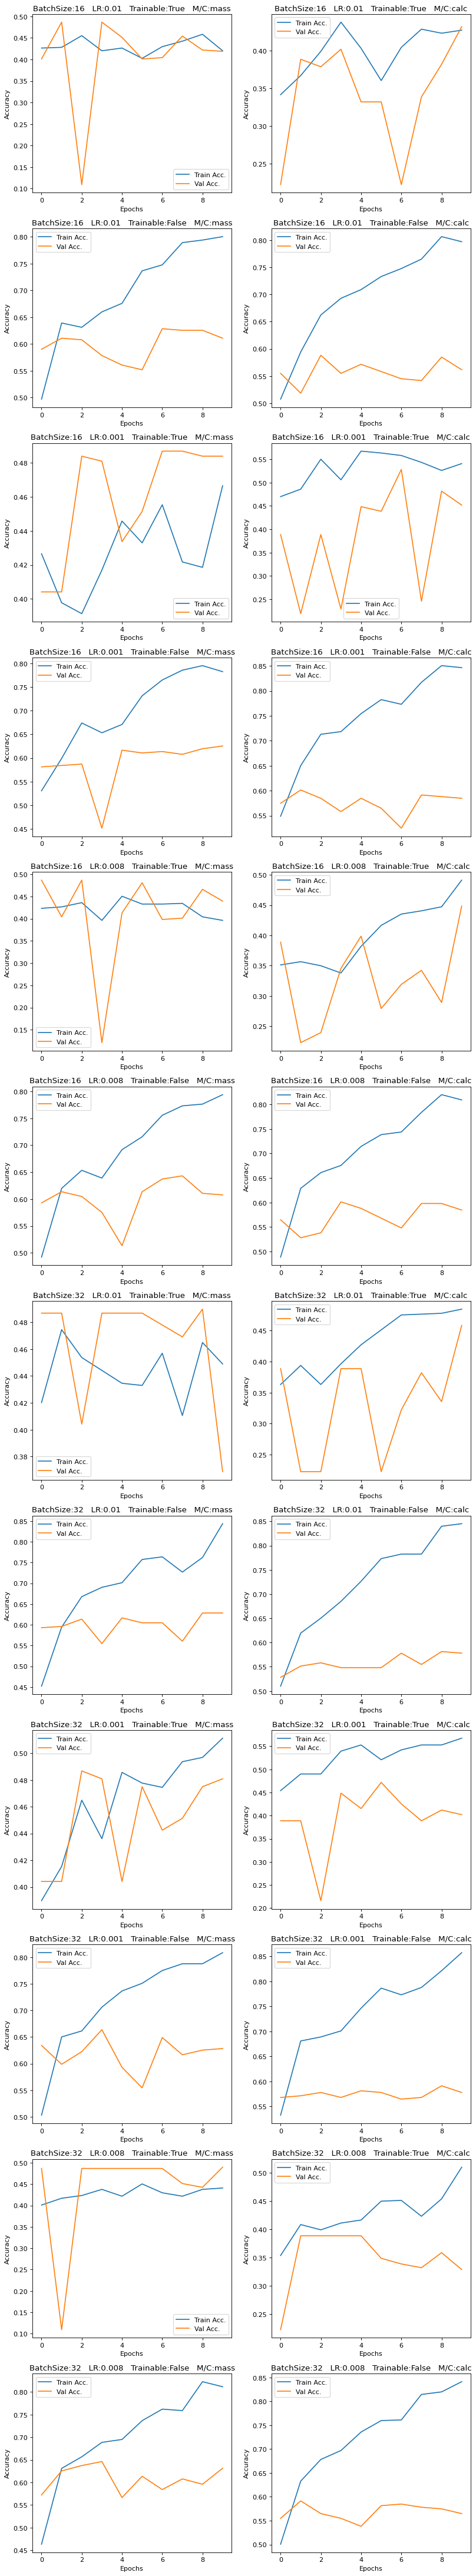

In [ ]:
from matplotlib.pyplot import figure
figure(figsize = (12, 70), dpi = 80)
batch_sizes = [16, 32]
learning_rates = [0.01, 0.001, 0.008]
trainable_layers = [True, False]
cancer_classifications = ["mass", "calc"]

count = 1

DATA_DIR = r"D:/VSC Workspace/breast_cancer_CNN/parameter__tuning/"
for batch in batch_sizes:

    for learning_rate in learning_rates:

        for trainable_layer in trainable_layers:

            for classification in cancer_classifications:

                filepath = str(batch) + "_" + str(learning_rate) + "_" + str(trainable_layer) + "_" + classification + ".npy"
                graph_title = f"BatchSize:{str(batch)}   LR:{str(learning_rate)}   Trainable:{str(trainable_layer)}   M/C:{classification}" 
                
                if (not os.path.isfile(DATA_DIR + filepath)):

                    continue

                data = np.load(DATA_DIR + filepath, allow_pickle = True).item()

                plt.subplot(12, 2, count)
                count = count + 1
                plt.plot(data['accuracy'])
                plt.plot(data['val_accuracy'])
                plt.xlabel("Epochs")
                plt.ylabel("Accuracy")
                plt.legend(['Train Acc.', 'Val Acc.'])
                plt.title(graph_title)

plt.show()

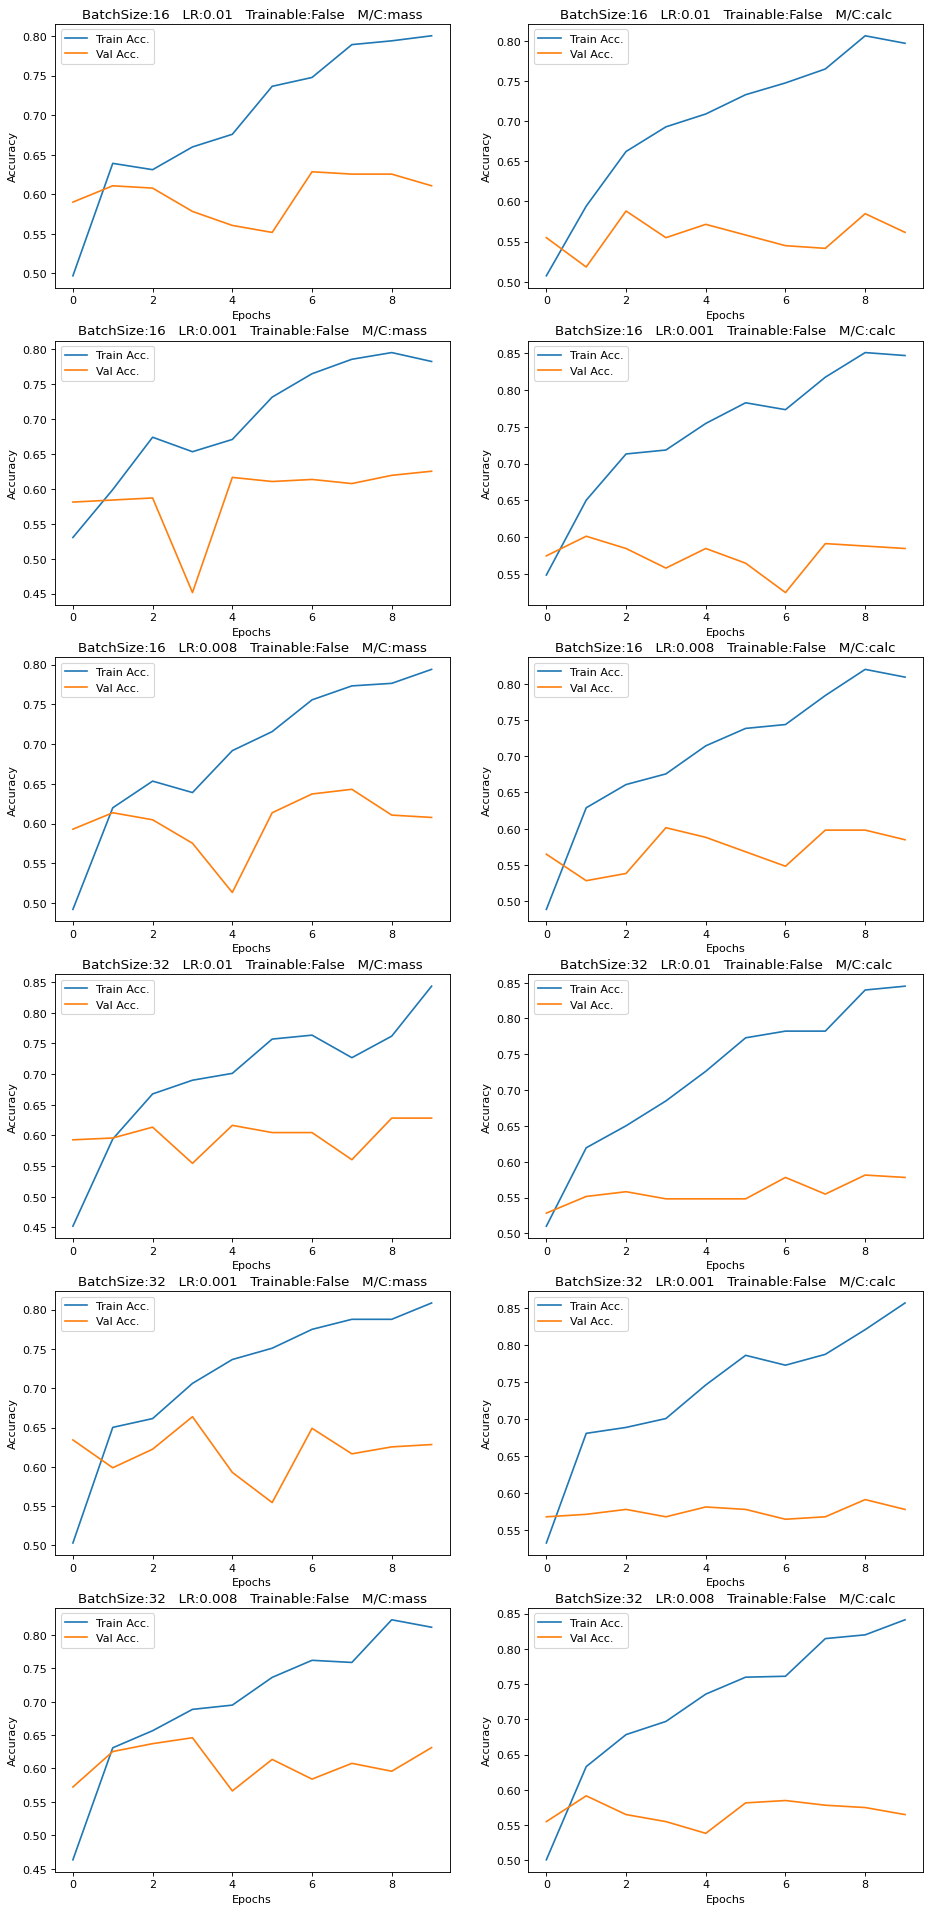

In [ ]:
figure(figsize = (14, 30), dpi = 80)
batch_sizes = [16, 32]
learning_rates = [0.01, 0.001, 0.008]
trainable_layers = [False] #trainable_layers = [True, False]
cancer_classifications = ["mass", "calc"]

count = 1

for batch in batch_sizes:

    for learning_rate in learning_rates:

        for trainable_layer in trainable_layers:

            for classification in cancer_classifications:

                filepath = str(batch) + "_" + str(learning_rate) + "_" + str(trainable_layer) + "_" + classification + ".npy"
                graph_title = f"BatchSize:{str(batch)}   LR:{str(learning_rate)}   Trainable:{str(trainable_layer)}   M/C:{classification}" 
                
                if (not os.path.isfile(DATA_DIR + filepath)):

                    continue

                data = np.load(DATA_DIR + filepath, allow_pickle = True).item()

                plt.subplot(6, 2, count)
                count = count + 1
                plt.plot(data['accuracy'])
                plt.plot(data['val_accuracy'])
                plt.xlabel("Epochs")
                plt.ylabel("Accuracy")
                plt.legend(['Train Acc.', 'Val Acc.'])
                plt.title(graph_title)

plt.show()

In [40]:
calc_test = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\calc_case_description_test_set.csv")
calc_train = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\calc_case_description_train_set.csv")
mass_test = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\mass_case_description_test_set.csv")
mass_train = pd.read_csv(r"D:\VSC Workspace\breast_cancimg\csv\mass_case_description_train_set.csv")

calc_test.head(5)

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,image file path,cropped image file path,ROI mask file path
0,P_00038,2,LEFT,CC,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...
1,P_00038,2,LEFT,MLO,1,calcification,PUNCTATE-PLEOMORPHIC,CLUSTERED,4,BENIGN,2,Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....
2,P_00038,2,RIGHT,CC,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....
3,P_00038,2,RIGHT,CC,2,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....,Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....
4,P_00038,2,RIGHT,MLO,1,calcification,VASCULAR,NaN,2,BENIGN_WITHOUT_CALLBACK,5,Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...,Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...


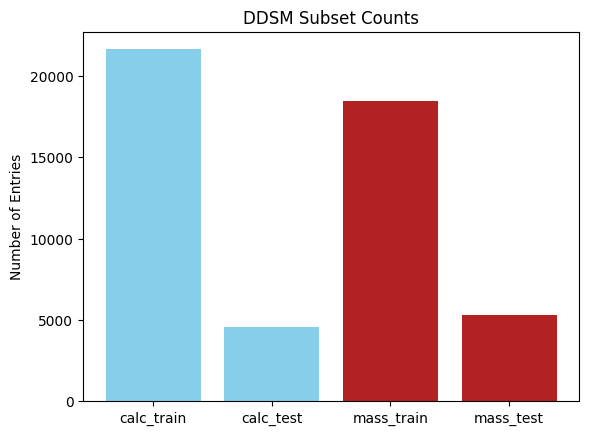

In [86]:
xlabels = ['calc_train','calc_test','mass_train','mass_test']
sizes = [calc_train.size, calc_test.size, mass_train.size, mass_test.size]
b_labels = ['skyblue','skyblue','firebrick','firebrick']
b_colors = ['skyblue','skyblue','firebrick','firebrick']

plt.ylabel("Number of Entries")
plt.bar(xlabels, sizes, color = b_colors)
plt.title("DDSM Subset Counts")
plt.show()

Text(0.5, 1.0, 'Mass Test Set')

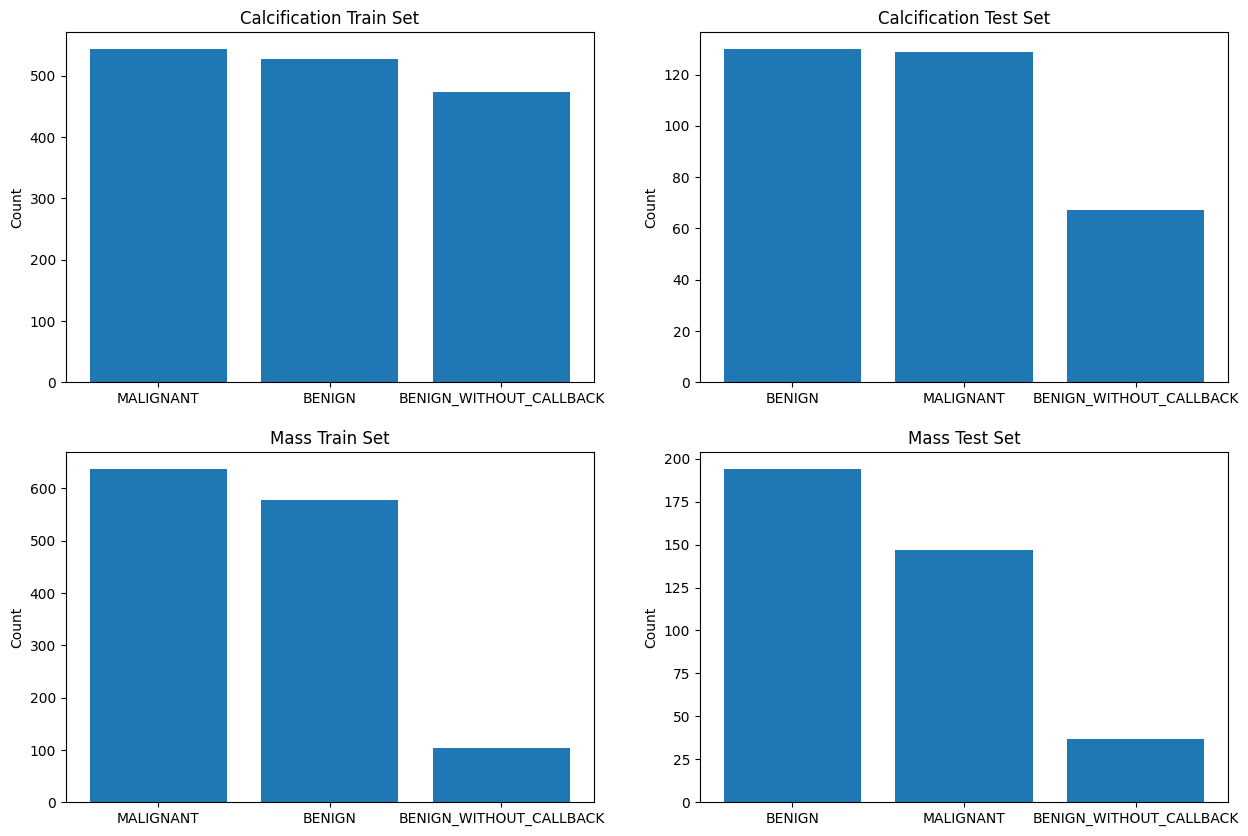

In [138]:
figure(figsize = (15, 10))
plt.subplot(2, 2, 1)
plt.bar(x = calc_train["pathology"].value_counts().keys(), height = calc_train["pathology"].value_counts())
plt.ylabel("Count")
plt.title("Calcification Train Set")
plt.subplot(2, 2, 2)
plt.bar(x = calc_test["pathology"].value_counts().keys(), height = calc_test["pathology"].value_counts())
plt.ylabel("Count")
plt.title("Calcification Test Set")
plt.subplot(2, 2, 3)
plt.bar(x = mass_train["pathology"].value_counts().keys(), height = mass_train["pathology"].value_counts())
plt.ylabel("Count")
plt.title("Mass Train Set")
plt.subplot(2, 2, 4)
plt.bar(x = mass_test["pathology"].value_counts().keys(), height = mass_test["pathology"].value_counts())
plt.ylabel("Count")
plt.title("Mass Test Set")